<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2022-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisis de les dades
  <br>2.1 Anàlisi estadístic bàsic 
  <br>2.2 Anàlisi exploratori de les dades
  <li>Preprocessament de les dades</li>
  <li>Reducció de la dimensionalitat</li>
  <li>Entrenament i test</li>
</ol><br>

**Important:** Cada exercici pot suposar diversos minuts d'execució, per aquest motiu l'entrega ha de realitzar-se en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** Existeix un tipus de cel·la especial per comentaris de text. Aquest tipus de cel·la us serà molt útil per respondre preguntes teòriques. Per canviar el tipus de cel·la a aquest tipus, al menú: Cell $\to$ Cell Type $\to$ Markdown.

**Important:** La solució plantejada no ha d'utilitzar mètodes, funcions o paràmetres declarats “deprecated” en futures versions.
   
Per realitzar aquesta PAC necessitarem les següents llibreries:

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: XAVIER MALTAS TARRIDAS</strong>
</div>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Càrrega del conjunt de dades (1 punt)

Durant aquesta pràctica utilitzarem el conjunt de dades [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el qual conté informació rellevant sobre diferents incendis esdevinguts al nord-est de Portugal. Cada mostra del conjunt de dades estarà formada per l'àrea de bosc cremada i el valor de múltiples factors que podrien ser els detonants o catalitzadors del foc. El conjunt de dades el trobareu al següent enllaç: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: per als exercicis d'aquesta PAC farem servir com a variable objectiu l'àrea: nombre d'hectàrees afectades per l'incendi. La resta de variables del conjunt de dades conformaran els atributs descriptius.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> carregueu el conjunt de dades "Forest Fires Data Set" utilitzant el mètode "read_csv" de "pandas" i mostreu:
<ul>
  <li>El nombre de files (mostres) del conjunt de dades.</li>
  <li>El nombre i nom dels atributs descriptius (variables que podrien ser usades per predir la variable objectiu).</li>
  <li>Contrasteu aquests atributs amb què es descriuen a la pàgina web del conjunt de dades.</li>
  <li>Verificar si hi ha o no "missing values" i en quines columnes.</li>
</ul>
Suggeriment: separeu el conjunt de dades original en les variables "X" (atributs descriptius) i "y" (variable objectiu).</div>

En primer lloc realitzarem un anàlisi descriptiu que ens proporciona una sintesi del que ens ofereix la mostra de dades. 
La mostra es compon de 517 registres on cada un disposa de 13 atributs.
Atributs de la mostra: 
<ul>
  <li>X : Coordenada espacial a l'eix X en el mapa del parc de Montesinho.</li>
  <li>Y : Coordenada espacial a l'eix Y en el mapa del parc de Montesinho.</li>
  <li>Month : Més de l'any.</li>
  <li>FFMC : El Fine Fuel Moisture Code és un codi que representa la relativa facilitat d'ignició i la inflamabilitat del combustible.</li>
  <li>DMC : El Duff Moisture Code correspon a una valoració numèrica del contingut mitjà d'humitat de capes orgàniques superficials lleugerament compactades (duff).</li>
  <li>DC : El Drought Code correspon a un valor numèric que indica el contingut mitjà d'humitat de les capes orgàniques profundes i compactes.</li>
  <li>ISI : El Initial Spread Index és un valor numèric que indica la taxa de propagació del foc.</li>
  <li>Temp : Temperatura en graus Celsius.</li>
  <li>RH : Humitat relativa.</li>
  <li>Wind : Velocitat del vent en km/h.</li>
  <li>Rain : Pluja registrada en mm/m2.</li>
  <li>Area : Àrea cremada del bosc en hectàrees.</li>
</ul>

Els atributs descriptius són aquells que ens permeten descriure/predir una altra variable objectiu. En el cas que ens ocupa, el que es pretén predir és la quantitat d'hectàrees que pot afectar un incendi segons uns factors determinats, així doncs, la variable objectiu és 'area'. La conclusió resultant que podem extreure d'aquí, és que la resta de paràmetres exceptuant 'area' del conjunt de dades, pot ser considerat com a atribut descriptiu, ja que són factors que ens permetran predir la variable objectiu 'area'. Aquesta conclusió pot ser clarament contrastada amb la descripció aportada a la mateixa web del set de dades, on es defineixen aquests atributs com a factors que descriuen les zones afectades pels incendis.

In [2]:
import pandas as pd
#Importing dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df=pd.read_csv(url)
df.info()
print('The number of rows is :', len(df))
headers = list(df.columns.values)
print('The number of headers is :', len(headers))
#Check if there is any missing value 
print('There is any missing value :', df.isnull().values.any())
#Index new column
df.insert(0, 'id', range(1, len(df)+1))
#New df - only area and id
dfArea = df[['id', 'area']].copy()
#Area param drop from original df
del df["area"]
# Checking dfs values - uncomment to see it
# df.head()
# dfArea.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
The number of rows is : 517
The number of headers is : 13
There is any missing value : False


# 2. Anàlisis de les dades (3 punts)

## 2.1 Anàlisi estadístic bàsic

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Elaboreu una anàlisi estadístic bàsic:: 
<ul>
  <li>Variables categòriques:</li>
     <ul>
      <li>Calculeu la freqüència.</li>
      <li>Feu un gràfic de barres.</li>
    </ul>
  <li>Variables numèriques:</li>
    <ul>
      <li>Calculeu estadístiques descriptives bàsiques: mitjana, mediana, desviació estàndard, ...</li>
      <li>Feu un histograma.</li>
    </ul>
  <li>Variables geoespacials:</li>
    <ul>
      <li>Feu un histograma bidimensional.</li>
    </ul>
</ul>
Suggeriment: podeu fer servir la llibreria "pandas" i les seves funcions "describe" i "value_counts", així com les funcions "bar", "hist" i "hist2d" de matplotlib.
</div>

C:\Users\xavim\AppData\Local\Temp\ipykernel_22488\1877925497.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


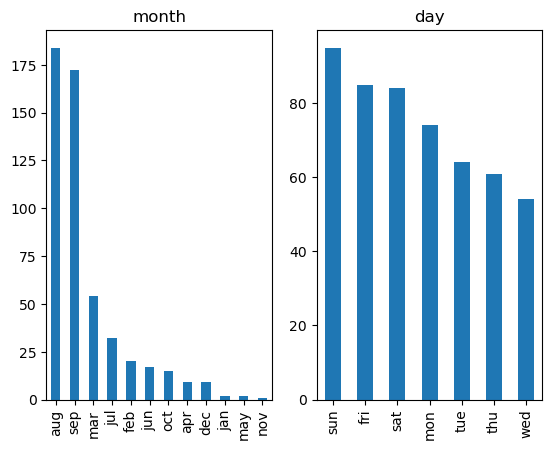

In [16]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

#Categorical variables analysis
categorical_features = ["month", "day"]
#Frequency plots
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[i]).set_title(categorical_feature)
fig.show()

In [ ]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Numerical variables analysis
numerical_features = ["FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

#Basic stadistics
df[numerical_features].describe()

#Distribution plots
for i, nf in enumerate(df[numerical_features]):
    ax = plt.subplot(2, 4, i + 1)
    # ax.hist(df[nf], bins=50, color = 'blue', edgecolor = 'black')
    sns.distplot(df[nf], color="dodgerblue", label="minivan", ax=ax)
    ax.set_title(nf)
plt.suptitle('Distribution of the numerical variables', y=1.05, size=16)
plt.tight_layout()
plt.show()

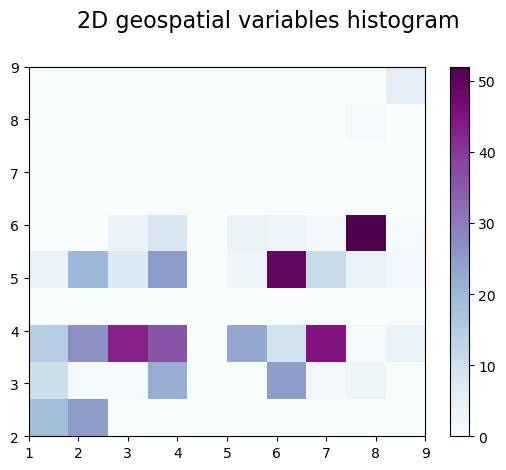

In [63]:
#Imports
import matplotlib.pyplot as plt

#Geospatial variables analysis
x=df['X']
y=df['Y']
plt.hist2d(x, y,cmap='BuPu')
plt.colorbar()
plt.suptitle('2D geospatial variables histogram', y=1, size=16)
plt.show()


Les variables categòriques són aquelles que representen tipus de dades que poden dividir-se en diferents grups. Per altra banda, les variables numèriques o quantitatives, són aquelles que representen una característica quantificable, on els seus valors són nombres. Finalment, les dades geoespacials són aquelles que representen algun succés ubicat sobre la superfície terrestre o prop d'aquesta.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> comenteu els resultats.
</div>

## 2.2 Anàlisi exploratori de les dades

En aquest apartat explorarem la relació dels atributs descriptius amb la variable objectiu.
<br>
Nota: tractarem de forma diferent els atributs categòrics dels numèrics

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> per a cada variable categòrica, mostreu un gràfic on superposareu per a cada categoria un histograma dels valors de la variable objectiu. Afegiu una llegenda per saber a quina classe correspon cada histograma.
    
La finalitat és observar com es distribueix el valor de la variable objectiu segons els valors de les categories de cada variable categòrica. D'aquesta manera identificarem de manera visual i ràpida si aquest atribut categòric està relacionat o no amb diferents valors de la resposta.
    
<hr>
Suggeriment: podeu fer servir la funció "hist" de la llibreria "matplotlib", així com el seu paràmetre "alpha" (transparència) perquè s'apreciïn els histogrames superposats.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> mirant els histogrames, et sembla que els atributs categòrics tindran algun pes a l'hora de predir la variable objectiu? Per què?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> per a cada categoria de les variables categòriques calculeu els valors de mitjana i desviació estàndard de la variable objectiu. La finalitat d'aquest exercici és verificar numèricament les diferències identificades anteriorment de forma visual.
<hr>
Suggeriment: podeu fer servir les funcions "mean" i "std" de la llibreria "numpy".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calcular i mostrar la correlació entre tots els atributs numèrics (incloent-hi els geoespacials) i la resposta.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> representeu gràficament les relacions entre totes les parelles de les variables numèriques del conjunt de dades (incloent-hi les geoespacials). La finalitat d'aquest exercici és poder observar i analitzar les correlacions entre les variables de manera gràfica.
<hr>Suggeriment: podeu fer servir la funció "pairplot" de la llibreria 'seaborn'.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> identifiqueu els 2 atributs que tenen una correlació més forta amb la resposta i els 3 amb una correlació més feble (coeficient de correlació major o menor en valor absolut).
    
Per observar i analitzar les correlacions gràficament, representeu, per a cadascun dels 5 atributs identificats, un scatter plot amb l'atribut a l'eix x i la resposta a l'eix y. A més, a cada gràfic afegiu la representació d'una regressió lineal que fiti els punts.
        
<hr>Suggeriment: podeu fer servir la funció "regplot" de la llibreria 'seaborn'.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> observant els gràfics, comenteu breument si aconseguiu veure les altes o baixes correlacions que havíeu identificat numèricament.
</div>

# 3. Preprocessament de les dades (3 punts)

Un cop analitzats els atributs descriptius, és el moment de preparar-los perquè ens siguin útils de cara a predir valors. En aquest apartat:
<li>Transformarem les variables categòriques en diverses variables binàries, una per a cada categoria.</li>
<li>Estandarditzarem els valors dels atributs descriptius perquè les seves escales no siguin gaire diferents.</li>
<li>Separarem el conjunt de dades original en dos subconjunts: entrenament i test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> elimina els atributs categòrics del conjunt de dades i en el seu lloc introdueix la transformació dels atributs esmentats a tantes variables binàries com categories tinguin.
<hr>
Suggeriment: utilitzeu la funció "get_dummies" de "pandas".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> estandarditza tots els atributs descriptius.
<hr>
Suggeriment: utilitzeu "StandardScaler" de "preprocessing".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> separa els atributs descriptius i la variable objectiu als subconjunts d'entrenament i test.
<hr>
Suggeriment: per separar entre train i test podeu fer servir "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> explica si la decisió de transformar el conjunt de dades (variables categòriques i estandardització) abans de fer la separació del conjunt de dades als subconjunts d'entrenament i test és una bona idea.
</div>

# 4. Reducció de la dimensionalitat (2 punts)

Amb el propòsit de comprovar visualment la distribució de la variable objectiu tenint en compte tots els atributs descriptius alhora, reduirem la dimensionalitat del problema a només dos atributs que seran la projecció dels atributs descriptius originals.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Apliqueu el mètode de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions el dataset original que conté tots els atributs.</li>
    <li>Genereu un gràfic amb el resultat del PCA en què es mostri, en funció dels valors de les dues components als eixos x i y, el valor de la variable objectiu usant l'escala de colors. L'objectiu és visualitzar la variació de la variable objectiu en funció dels valors dels components principals generats.</li>
</ul>
    
NOTA: compte, no inclogueu la variable objectiu en la reducció de dimensionalitat. Volem explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

<hr>
Suggeriment: no cal que programeu l'algorisme de PCA, podeu fer servir la implementació disponible a la llibreria de "scikit-learn".<br>
Suggeriment: per al gràfic, podeu fer servir l'scatter plot de matplotlib amb el paràmetre "c", que indica el color dels punts, igual a la variable objectiu.<br>
Suggeriment: utilitzeu el paràmetre "norm=matplotlib.colors.LogNorm()" dins de l'scatter per mostrar de forma logarítmica l'àrea cremada de bosc.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Repetiu la reducció de dimensionalitat, però en aquest cas usant TSNE. Podeu trobar més informació sobre aquest algorisme al link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que abans, genereu un gràfic amb el resultat del TSNE en què es mostri, en funció dels valors de les 2 noves dimensions als eixos x i y, el valor de la variable objectiu fent servir una escala de colors.</li>
</ul>

<hr>
Suggeriment: no cal que programeu l'algorisme TSNE, podeu fer servir la implementació disponible a la llibreria de "scikit-learn".<br>
Suggeriment: a part d'especificar el nombre de components, proveu de fer servir els paràmetres "learning_rate" i "perplexity".<br>
Suggeriment: per al gràfic, podeu fer servir l'scatter plot de matplotlib amb el paràmetre "c", que indica el color dels punts, igual a la variable objectiu.<br>
Suggeriment: utilitzeu el paràmetre "norm=matplotlib.colors.LogNorm()" dins de l'scatter per mostrar de forma logarítmica l'àrea cremada de bosc.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> observant els dos gràfics, creieu que ha funcionat bé la reducció de dimensionalitat? Us sembla que les 2 noves dimensions aconsegueixen explicar la variació de la variable objectiu i visualitzar diferenciadament àrees d'incèndies grans o petites? Si utilitzéssim les 2 noves variables per predir la variable objectiu, serien bons els resultats obtinguts?
    
Per què aconseguim resultats tan diferents amb els dos mètodes?
</div>

# 5. Entrenament i test (1 punt)

En aquest darrer exercici es tracta d'aplicar un mètode d'aprenentatge supervisat, concretament el Random Forest per a regressió, amb l'objectiu de predir la variable objectiu i avaluar la precisió obtinguda amb el model. Per això:
<ul>
    <li>Entrenarem el model amb el conjunt d'entrenament i veurem com es comporta tant amb el subconjunt d'entrenament com amb el de test.</li>
    <li>Analitzarem si el resultat aconseguit té sentit i veurem si es pot millorar d'alguna manera.</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> usant el conjunt de dades preprocessat (variables categòriques i estandardització) sense aplicar reducció de la dimensionalitat:
<ul>
    <li>Definiu un model Random Forest (fixant n_estimators=100 i random_state=seed).</li>
    <li>Mostreu la precisió del model tant al subconjunt d'entrenament com de test.</li>
</ul>
<hr>
Suggeriment: per entrenar un model random forest podeu fer servir "RandomForestRegressor" de sklearn.<br>
Suggeriment: per mostrar la precisió del model podeu fer servir el mètode "score" del propi model.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> explica per què la precisió del model sobre els valors d'entrenament i test presenten aquests valors.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> discutiu quines tècniques podríeu aplicar per millorar la situació actual del model.
</div>